In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [7]:
df=load_digits()

In [8]:
x=df.data
y=df.target

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.3)

In [14]:
m = KNeighborsClassifier()

In [15]:
m.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [16]:
pred=m.predict(X_test)

In [17]:
df1 = pd.DataFrame({"Actual":Y_test,"Predicted":pred})

In [18]:
df1.head()

,Actual,Predicted
0,2,2
1,9,9
2,7,7
3,4,4
4,4,4


In [19]:
m.score(X_test,Y_test)

0.9833333333333333

In [22]:
kfold= model_selection.KFold(n_splits=10,random_state=7)

In [23]:
res=model_selection.cross_val_score(m,x,y,cv=kfold,scoring="accuracy")

In [24]:
res

array([0.92777778, 0.98888889, 0.98888889, 0.97777778, 0.96111111,
       0.97777778, 0.98888889, 0.98324022, 0.98324022, 0.96089385])

In [25]:
res.sum()/10

0.9738485412787089

In [26]:
res1=model_selection.cross_val_score(m,x,y,cv=kfold,scoring="neg_log_loss")

In [27]:
res1

array([-0.66831426, -0.02962516, -0.07148313, -0.06420906, -0.43955895,
       -0.03856648, -0.03964212, -0.0349096 , -0.25194677, -0.45336659])

In [29]:
print(classification_report(Y_test,pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        55
          1       0.93      1.00      0.96        51
          2       1.00      1.00      1.00        59
          3       0.98      1.00      0.99        44
          4       1.00      0.97      0.98        65
          5       1.00      0.98      0.99        65
          6       1.00      1.00      1.00        54
          7       0.98      0.98      0.98        54
          8       0.98      0.89      0.93        47
          9       0.96      1.00      0.98        46

avg / total       0.98      0.98      0.98       540



In [31]:
print(confusion_matrix(Y_test,pred))

[[55  0  0  0  0  0  0  0  0  0]
 [ 0 51  0  0  0  0  0  0  0  0]
 [ 0  0 59  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  0  0]
 [ 0  1  0  0 63  0  0  0  1  0]
 [ 0  0  0  0  0 64  0  0  0  1]
 [ 0  0  0  0  0  0 54  0  0  0]
 [ 0  0  0  0  0  0  0 53  0  1]
 [ 0  3  0  1  0  0  0  1 42  0]
 [ 0  0  0  0  0  0  0  0  0 46]]


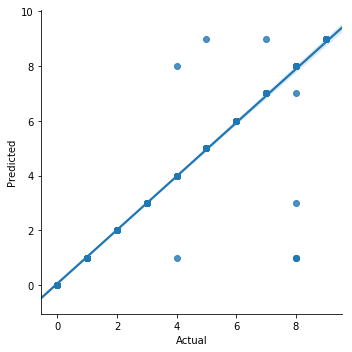

In [33]:
sns.lmplot("Actual",y = "Predicted",data = df1)

In [34]:
Y = pd.DataFrame(y)

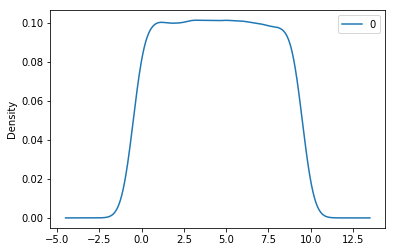

In [35]:
Y.plot(kind = "kde")